## **Project Name: Integrated Retail Analytics for Store Optimization**

##### **Project Type**    - *EDA + Regression*
##### **Contribution**    - *Individual*

## **Project Summary**

#### ***Integrated Retail Analytics for Store Optimization***

As part of my academic project, I worked on a practical case titled **"Integrated Retail Analytics for Store Optimization."** The goal of this project was to analyze retail data using `data science` and `machine learning` techniques, understand store performance patterns, and build a reliable model to forecast weekly sales.

I was provided with three datasets: one containing **sales data**, another with **store details**, and a third with **external features** like fuel prices, CPI, unemployment, markdown offers, and holiday indicators. My first task was to clean and merge all these datasets properly using common columns like `Store` and `Date`.

After merging, I focused on **data cleaning**, where I checked for missing values, removed duplicates, corrected data types, and created some new features like `Month`, `Year`, `Week`, and `Sales per Square Foot`. I also converted categorical values into numeric format for model compatibility. Once the data was cleaned and ready, I move on to **Exploratory Data Analysis (EDA)** part.

In EDA, I divided the analysis into **Univariate**, **Bivariate**, and **Multivariate** sections (UBM). I created 15 different charts that helped me understand the sales behavior, store performance, holiday effects, and how external factors influenced sales. Some of the key insights I observed were:

- **Type A stores** had the highest weekly sales and performed best during holiday periods.

- **Larger stores** generally had higher sales, but size alone was not the only factor.

- **Sales showed a seasonal pattern**, with spikes during festivals and holidays.

- External factors like **Fuel Price**, **CPI**, and **Unemployment** didn’t directly affect sales but may have an indirect influence.

- **Markdown1 (discount offers)** had a visible positive impact on sales, especially in Type A and B stores.

- Certain departments performed better across stores, as seen in the heatmap.

After analyzing the data, I moved on to the **Machine Learning** part. I built three models to predict weekly sales:

1. **Linear Regression** – This gave me a basic idea but was not suitable for this complex data. It had a low R2 Score (0.6895) and high error (RMSE 12,776).

2. **Random Forest Regressor** – This was the most accurate model. It performed excellently with an R2 of 0.9987 and RMSE of just 818. After tuning with `RandomizedSearchCV`, I improved it slightly to R2 of 0.9988 and RMSE of 802.

3. **XGBoost Regressor** – This model was also quite strong. It initially gave R2 of 0.9945 and RMSE of 1,707. After tuning, I got a slightly better R2 of 0.9946 and RMSE of 1,683.

I also created visualizations like **Actual vs Predicted** (before and after tuning) using line and scatter plots. This helped me clearly see how close the predictions were to the actual values.

In the final phase, I wrote my **insights and recommendations**. Based on the analysis, I strongly recommended using the **Random Forest (Tuned)** model for future weekly sales forecasting. I also suggested focusing more on **Type A stores**, planning **discount offers around festivals**, and improving **underperforming departments** based on heatmap results.

This project helped me improve my skills in data handling, visualization, and machine learning model building. It also gave me real-world exposure to how analytics can help in the retail sector for better decision-making and sales forecasting.

## **GitHub Link**

[GitHub Repo](https://github.com/dipankarmajumdar/Integrated-Retail-Analytics-for-Store-Optimization)

## **1. Business Problem Statement**

In this retail world, namaging hundreds of stores accross different locations is not an easy job. Every store is different - some are big, some are small, some do really well, and others not so much. The goal of this project is to use past data to understand whats really going on this stores and help improve their overall performance.

I am trying to solve a some important problems here:
- **Find out which stores are doing well**, and whats make them successful. This can help other stores learn and improve.
- **Predict future sales**, so that store can plan better - like how much stock to keep or how many staff members to schedule.
- **Understand how outside factors** (like fuel prices, holidays, weather, and promotions) affect sales. Foe example do sales go up during certain holidays or when prices are low?

By analyzing this data, we can give useful suggesions to store managers and help the company make smarter decisions in the future.

## **2. Data Sources & Description**

For this project, I am using 3 csv dataset. All of them are connected to each other and give different types of information about store sales. Simple breakdown is below:

1. **stotes-data-set.csv**  
This file tell us the basic info about each store. It has things like:
- Store number (unique ID)
- What type of store it is (A, B or C)
- Size of store in square feet

2. **features-data-set.csv**  
This one is more detailed. It give me extra information that might affect sales, like:
- What the temperature was on that date
- Fues price in the area
- Whether it was a holiday or not
- Some spacial discount (markdowns) going on
- CPI and Unemployment rate

3. **sales-data-set.csv**  
This is the main file. I has the actual sales numbers. It shows:
- Which store and depertment sold what
- Weekly sales amount
- Whether it was holiday week or not

I will merge all 3 file togather using the **Store** and the **Date** columns, so I can get full piture for each week's sales - including store info and outside factors like weather and holidays.

## **3. Import Libraries**

In [1]:
# Basic Libraries
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# Encoding & scaling
from sklearn.preprocessing import LabelEncoder

# warnings
import warnings
warnings.filterwarnings("ignore")

# Plot Settings
sns.set(style='whitegrid')
plt.rcParams["figure.figsize"] = (12,6)

## **4. Load and Merge Datasets**

In this step, I am going to load all `3 CSV datasets` and merge them into one single dataset. It will hel me do proper analysis and modeling, since I have all the information in one place - **store details**, **weekly sales**, and extra features like **holidays** and **fuel price**.

In [2]:
# Load all CSV datasets
stores_df = pd.read_csv("./data/stores-data-set.csv")
features_df = pd.read_csv("./data/features-data-set.csv")
sales_df = pd.read_csv("./data/sales-data-set.csv")

# Show the first 5 rows to check
print("Stores Data:")
display(stores_df.head())

print("Features Data:")
display(features_df.head())

print("Sales Data:")
display(sales_df.head())

Stores Data:


,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


Features Data:


,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,05/02/2010,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,12/02/2010,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,19/02/2010,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,26/02/2010,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,05/03/2010,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


Sales Data:


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,05/02/2010,24924.50,False
1,1,1,12/02/2010,46039.49,True
2,1,1,19/02/2010,41595.55,False
3,1,1,26/02/2010,19403.54,False
4,1,1,05/03/2010,21827.90,False


**Now I will merge the data.**

- First, merge `sales` with `stores` on the "Store" column.
- Then, merge that with the `features` dataset on "Store" and "Date".

In [3]:
# Drop IsHoliday from sales — I will use the one from features
sales_df.drop(columns=['IsHoliday'], inplace=True)

# First merge sales with features (on Store and Date)
merged_sf = pd.merge(sales_df, features_df, on=['Store', 'Date'], how='left')

# Then merge with stores
df = pd.merge(merged_sf, stores_df, on='Store', how='left')

In [4]:
# Check final merged data
print("Merged Dataset:")
display(df.head())

# Basic info
print("Shape of final dataset:", df.shape)
df.info()

Merged Dataset:


,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,1,05/02/2010,24924.50,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,12/02/2010,46039.49,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,19/02/2010,41595.55,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,26/02/2010,19403.54,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,05/03/2010,21827.90,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


Shape of final dataset: (421570, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   Temperature   421570 non-null  float64
 5   Fuel_Price    421570 non-null  float64
 6   MarkDown1     150681 non-null  float64
 7   MarkDown2     111248 non-null  float64
 8   MarkDown3     137091 non-null  float64
 9   MarkDown4     134967 non-null  float64
 10  MarkDown5     151432 non-null  float64
 11  CPI           421570 non-null  float64
 12  Unemployment  421570 non-null  float64
 13  IsHoliday     421570 non-null  bool   
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usa

## **5. Data Cleaning**

### **5.1 Check for missing values**

- **Count total missing values**

In [5]:
# Total missing values in the dataset
print("Total missing values:")
display(df.isnull().sum().sum())

Total missing values:


np.int64(1422431)

- **Count missing values by each column**

In [6]:
# Missing values by each column
print("Missing values column-wise:")
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
display(missing_values)

Missing values column-wise:


MarkDown2    310322
MarkDown4    286603
MarkDown3    284479
MarkDown1    270889
MarkDown5    270138
dtype: int64

- **Visualize Missing Values using Heatmap**

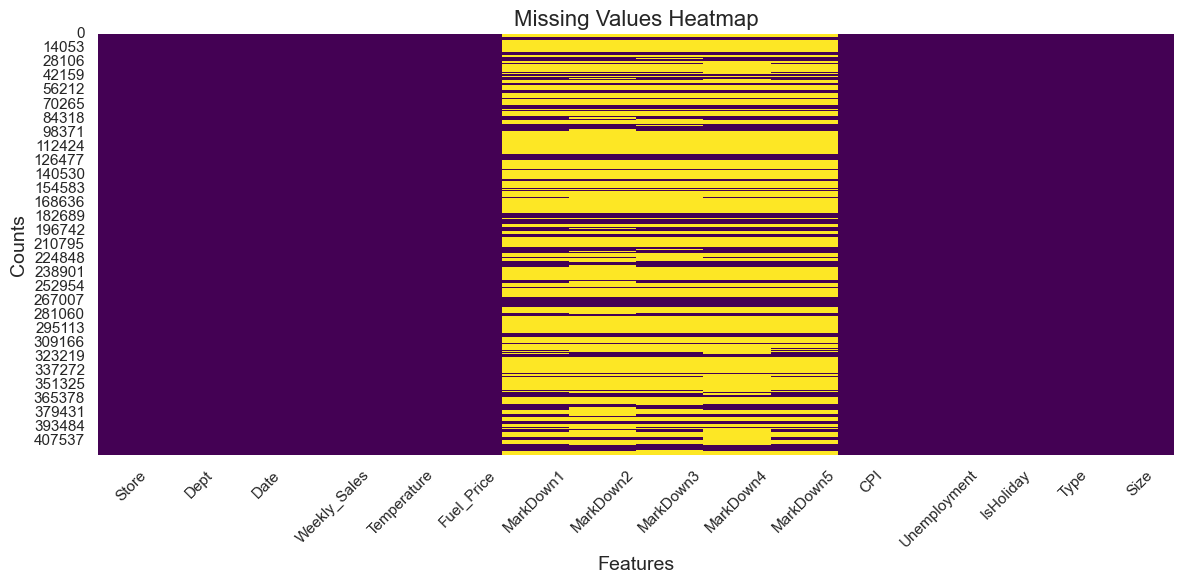

In [7]:
# Visualize missing values using a heatmap
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap", fontsize=16)
plt.xlabel("Features", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **5.2 Check for Duplicate Rows**

In [8]:
# Check how many duplicate rows exist
duplicate_values = df.duplicated().sum()

print(f"Number of duplicate rows in the dataset: {duplicate_values}")

Number of duplicate rows in the dataset: 0


### **5.3 Fix Data Types**

- **Check Datatype**

In [9]:
# Check the data types of all columns
print("Data types before fixing:")
print(df.dtypes)

Data types before fixing:
Store             int64
Dept              int64
Date             object
Weekly_Sales    float64
Temperature     float64
Fuel_Price      float64
MarkDown1       float64
MarkDown2       float64
MarkDown3       float64
MarkDown4       float64
MarkDown5       float64
CPI             float64
Unemployment    float64
IsHoliday          bool
Type             object
Size              int64
dtype: object


- **Fix Datatype**

In [10]:
# Convert 'Date' column to 'datetime'
df['Date'] = pd.to_datetime(df['Date'].astype(str).str.strip(), dayfirst=True, errors='coerce')

# Convert Store 'Type' to 'category'
df['Type'] = df['Type'].astype('category')

In [11]:
# Check the data types of all columns
print("Data types after fixing:")
print(df.dtypes)

Data types after fixing:
Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday                 bool
Type                  category
Size                     int64
dtype: object


### **5.4 Handle Missing Values**

- **5 MarkDown Column**  
These columns are represents special discount values. Missing value usually means no offer ia present now, so I can fill with `0`.

In [12]:
# Fill missing values in MarkDown columns with 0, as missing means no offer/discount was present
markdown_cols = ['MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5']
df[markdown_cols] = df[markdown_cols].fillna(0)

- **Check after handling missing value**

In [13]:
# Final check for missing values
print("Check missing values after handling:")
display(df.isnull().sum())

Check missing values after handling:


Store           0
Dept            0
Date            0
Weekly_Sales    0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday       0
Type            0
Size            0
dtype: int64

### **5.5 Sort the Data and Reset Index**

In [14]:
# Sort by Store and Date
df.sort_values(by=['Store', 'Date'], inplace=True)

# Reset index after sorting
df.reset_index(drop=True, inplace=True)

# Check final dataset
print("Final Data after cleaning, sorting and resetting index:")
display(df.head())

Final Data after cleaning, sorting and resetting index:


,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315
1,1,2,2010-02-05,50605.27,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315
2,1,3,2010-02-05,13740.12,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315
3,1,4,2010-02-05,39954.04,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315
4,1,5,2010-02-05,32229.38,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315


## **6. Exploratory Data Analysis (EDA)**

### **UBM Analysis Plan – 15 Charts**

I am breaking it into 3 parts:

#### **1. Univariate Analysis (5 charts)**

#### **1.1 Univariate Chart #1: Store Type Distribution**

I want to see how many store fall into **Type** category (A, B, C). It will show which type of store is the most common.

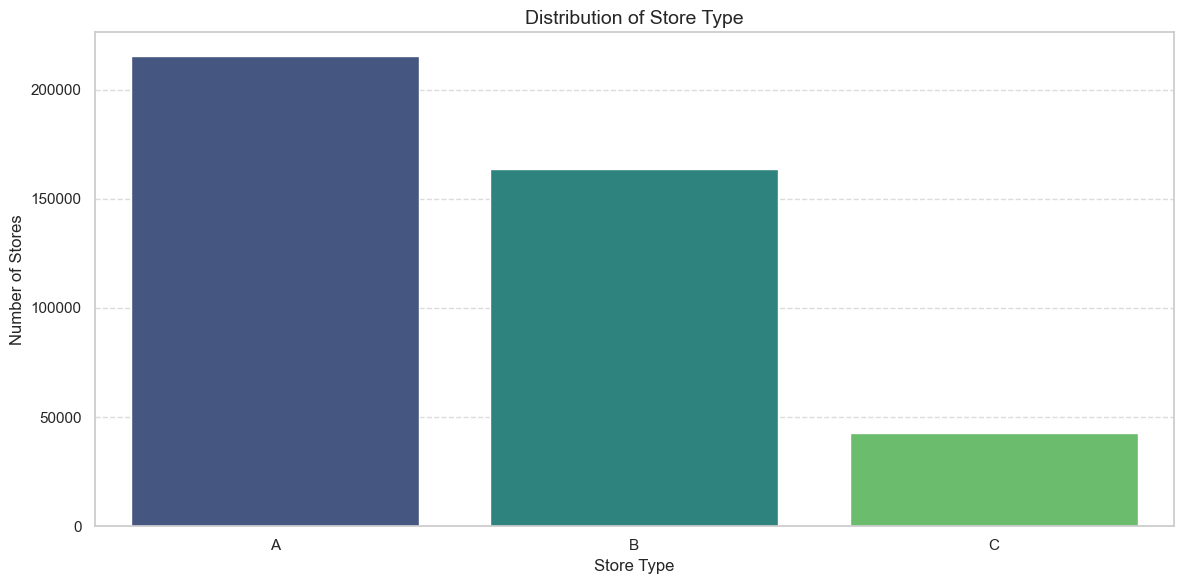

In [15]:
# Countplot for Store Type
sns.countplot(data=df, x='Type', palette='viridis')
plt.title("Distribution of Store Type", fontsize=14)
plt.xlabel("Store Type", fontsize=12)
plt.ylabel("Number of Stores", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

[ *Counting how many `small`, `medium`, and `big` stores a retail company has. Type `A`, `B`, `C` might represent that, and this chart gives me the first feel of the store network.* ]

#### **1.2 Univariate Chart #2: Store Size Distribution**

I want to know about the **distribution of store size**. Most stores are `small`, `medium` or `large`? 

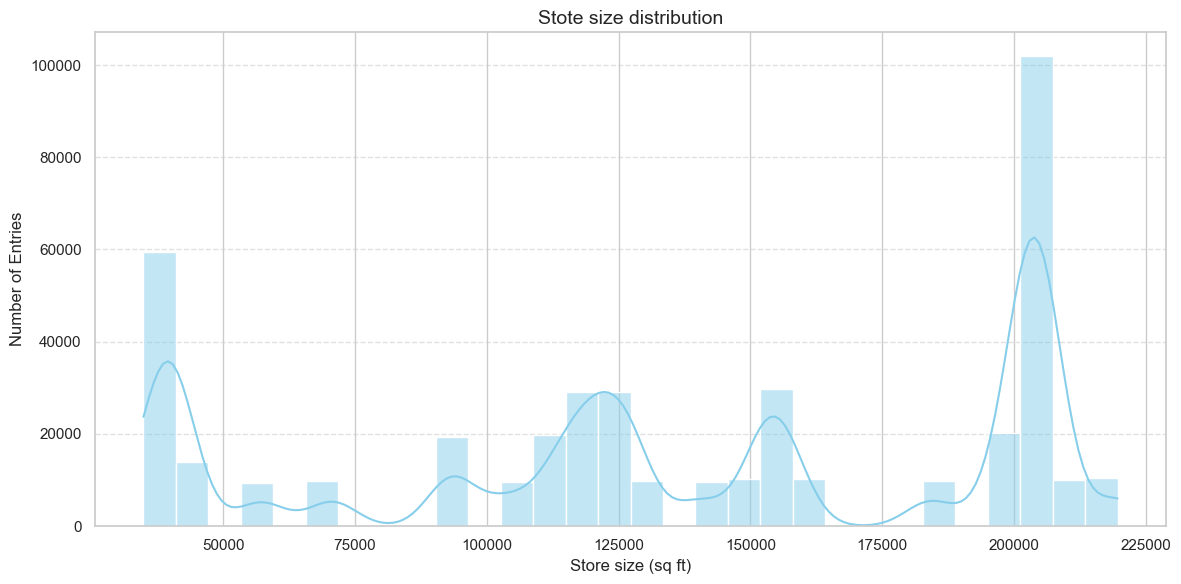

In [16]:
# Using Histogram to visualize store size
sns.histplot(data=df, x='Size', bins=30, kde=True, color='skyblue')
plt.title("Stote size distribution", fontsize=14)
plt.xlabel("Store size (sq ft)", fontsize=12)
plt.ylabel("Number of Entries", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

[ *This is like checking how big the stores are, they are `mall-size` or a `small outlets`? If most stores are in a certain range, I can guess what kind of customer experince the company usually offers.* ]

#### **1.3 Univariate Chart #3: Weekly Sales Distribution**

I want to see how weekly sales values are distributed. This tell me whether sales are usually `low`, `medium` or `high`.

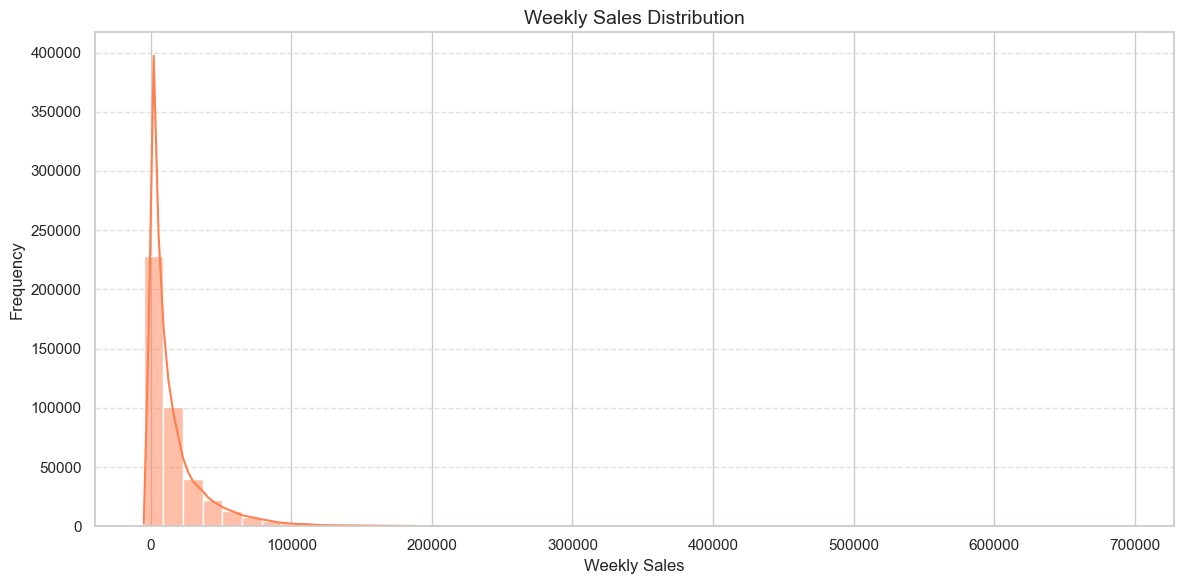

In [17]:
# Using Histogram for weekly sales
sns.histplot(data=df, x='Weekly_Sales', bins=50, kde=True, color='coral')
plt.title("Weekly Sales Distribution", fontsize=14)
plt.xlabel("Weekly Sales", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

[ *This plot tells me what the `typical` sales week looks like and if there are weeks where something crazy happened.* ]

#### **1.4 Univariate Chart #4: IsHoliday Pie Chart**

I want to know how much our data represents **Holiday Weeks** vs **Normal Weeks**. 

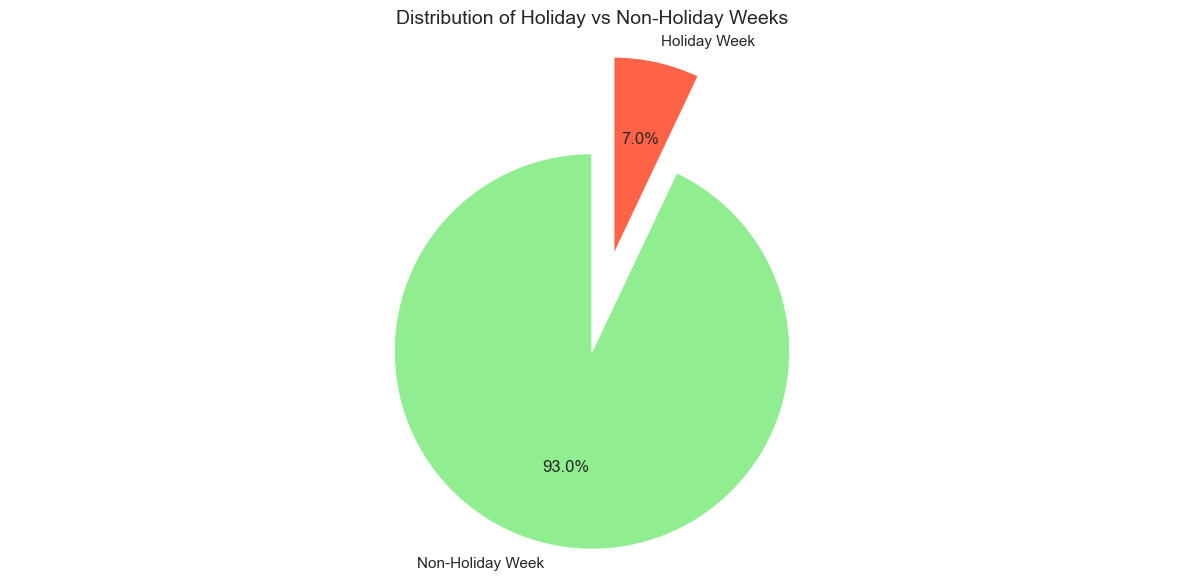

In [18]:
# Count the holiday vs non-holiday weeks and I am using Pie chart to visualize
holiday_counts = df['IsHoliday'].value_counts()

# labels
labels = ['Non-Holiday Week', 'Holiday Week']

# Pie chart
plt.pie(holiday_counts, labels=labels, autopct='%1.1f%%', colors=['lightgreen', 'tomato'], startangle=90, explode=[0, 0.5])
plt.title("Distribution of Holiday vs Non-Holiday Weeks", fontsize=14)
plt.axis("equal")
plt.tight_layout()
plt.show()

[ *This is like ckecking how many festival or sale weeks the store had in a year. If holidays are rare, I will need to treat them carefully - they may have a big effect on sales even if they are very minimul in number.* ]

#### **1.5 Univariate Chart #5: Fuel Price Trend Over Time**

I want to visualize how **fuel prices** have changed over time. This is useful because fuel price can affect customer behavior and sales indirectly.

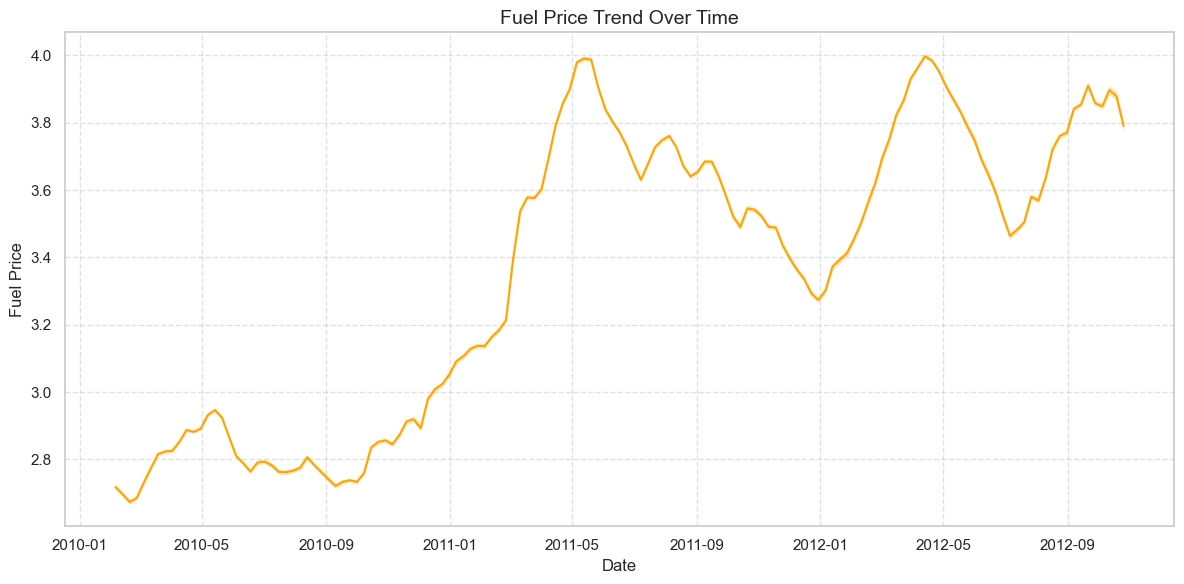

In [19]:
# I am creating a line plot to visualize fuel price over time
sns.lineplot(data=df.sort_values("Date"), x='Date', y='Fuel_Price', color='orange')
plt.title("Fuel Price Trend Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Fuel Price", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

[ *Here visualize how rising the fuel prices can make customer think twise about traveling to stores, especially if they are so much. This chart help me to see those price changes over the months and years.* ]

#### **2. Bivariate Analysis (5 charts)**

#### **2.1 Bivariate Chart #6: Store Type vs Weekly Sales**

I want to compare **weekly sales** accross different **store types (A, B, C)**. This help me to see if a certain store type usually earns more or less than others.

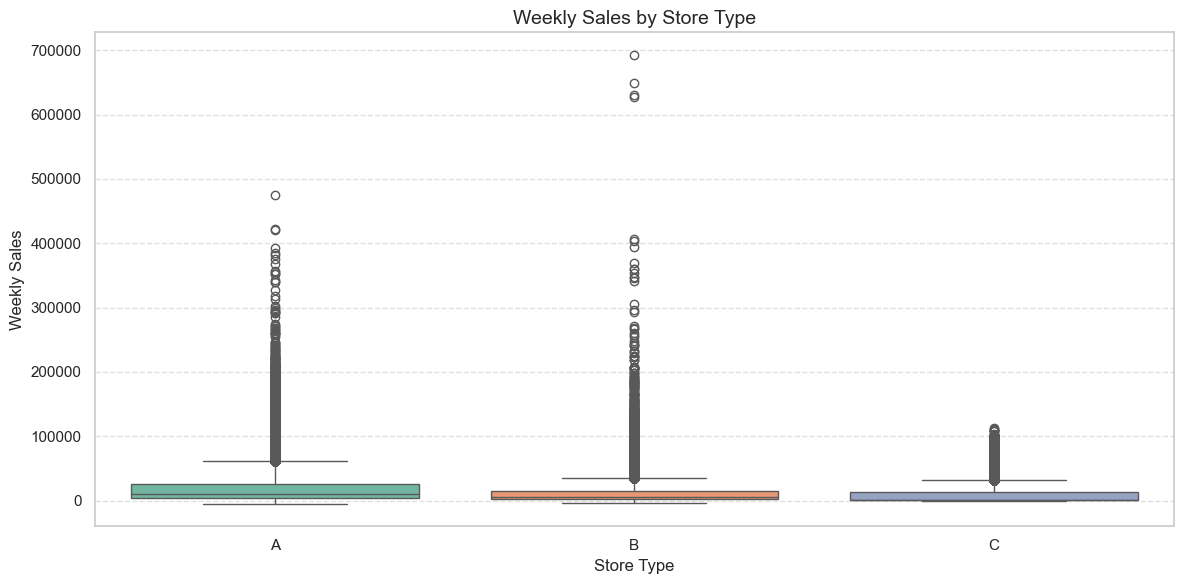

In [20]:
# Using Boxplot to compare Weekly Sales by Store Type
sns.boxplot(data=df, x='Type', y='Weekly_Sales', palette='Set2')
plt.title("Weekly Sales by Store Type", fontsize=14)
plt.xlabel("Store Type", fontsize=12)
plt.ylabel("Weekly Sales", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

[ *This chart visualize like comparing big mall-type stores vs small outlets - who's selling more each week?* ]

#### **2.2 Bivariate Chart #7: Store Size vs Weekly Sales**

I want to see if **Bigger Stores** make **more sales**. 

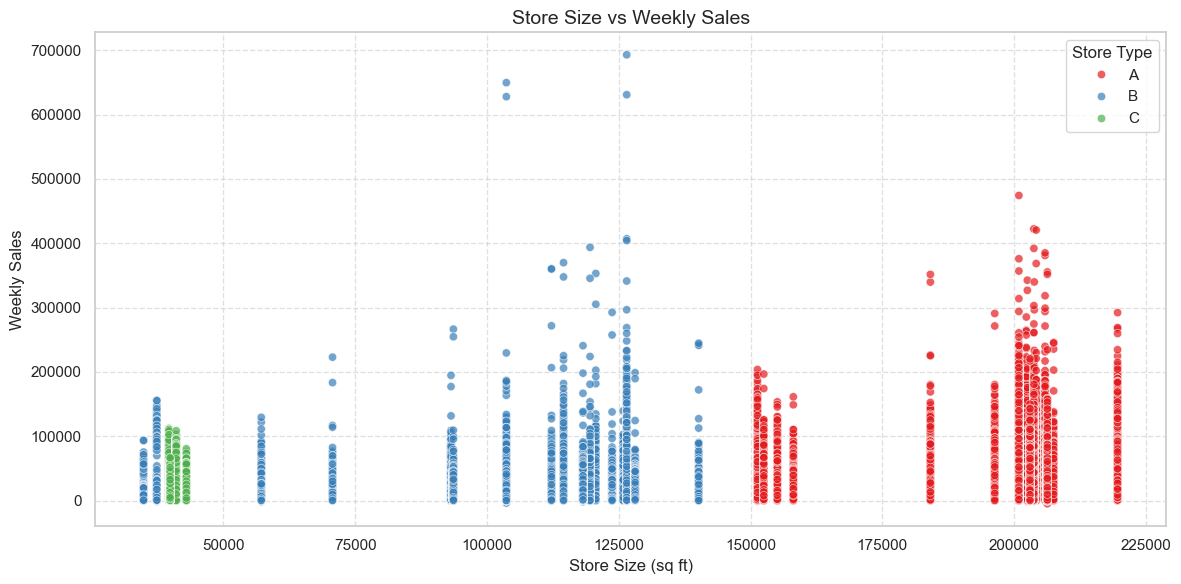

In [21]:
# Using Scatter plot to visualize the Store Size vs Weekly Sales
sns.scatterplot(data=df, x='Size', y='Weekly_Sales', hue='Type', alpha=0.7, palette='Set1')
plt.title("Store Size vs Weekly Sales", fontsize=14)
plt.xlabel("Store Size (sq ft)", fontsize=12)
plt.ylabel("Weekly Sales", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Store Type')
plt.tight_layout()
plt.show()

[ *The chart visualize or asking: A mall-type store bring in more sales? If the dots are follow the store size and if the trend is upward, that means size is a bigger factor in a retail sales.* ]

#### **2.3 Bivariate Chart #8: Date vs Weekly Sales (Sales Trend Over Time)**

I want to see how **weekly sales change over time**. It help me to find **seasonal patterns** or **trends**.

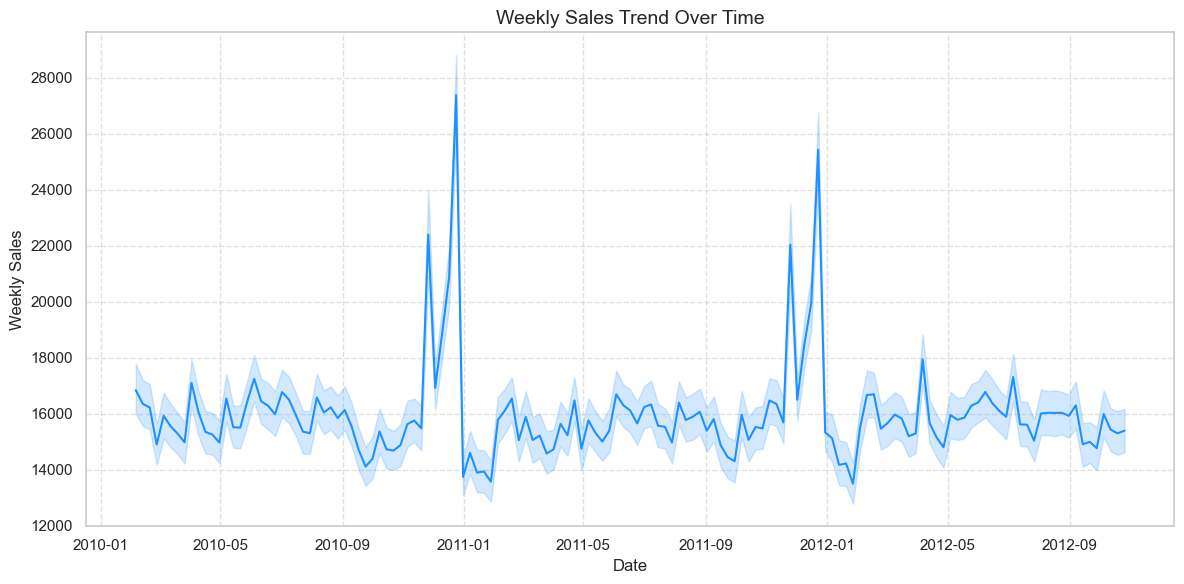

In [22]:
# Using Line plot to visualize Weekly Sales over Time
sns.lineplot(data=df.sort_values('Date'), x='Date', y='Weekly_Sales', color='dodgerblue')
plt.title("Weekly Sales Trend Over Time", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Weekly Sales", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

[ *The chart visualize that the sales follwing **up-and-down pattern** each week. So after viewing the up-and-down in this chart, I can explain - if sales spike every **November** or **Decembar** month, it is a **holiday** or **festival season**.* ]

#### **2.4 Bivariate Chart #9: CPI vs Weekly Sales**

I want to see if there's any relationship between **inflation (CPI)** and **sales**. If CPI (Consumer Price Index) rises (Cost of living increases), customer may spend less or may be don't spend money.

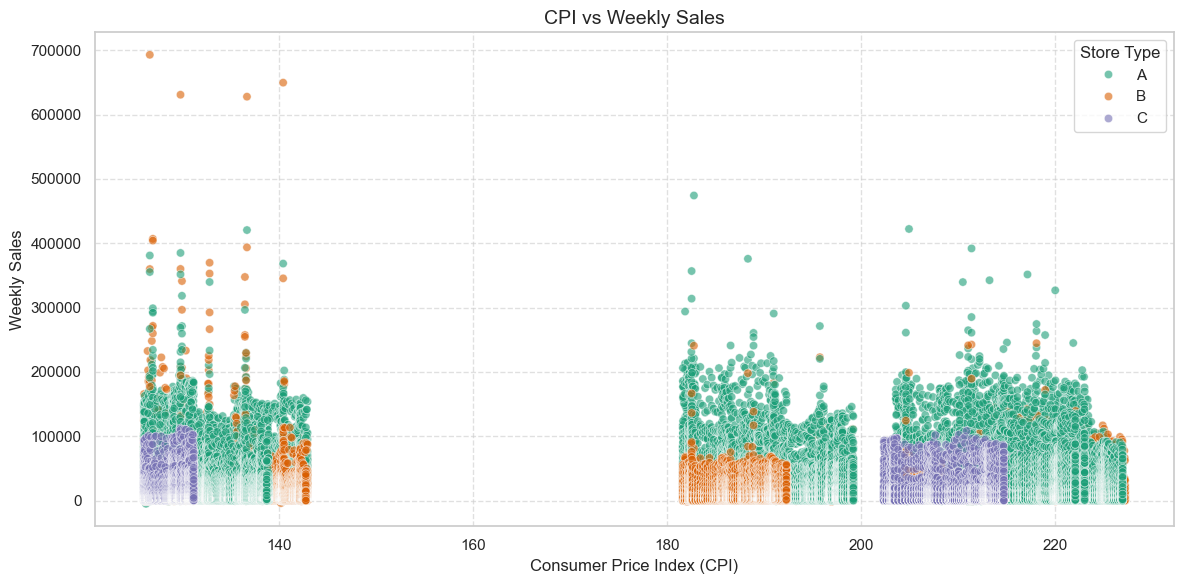

In [23]:
# Using Scatter plot to visualize the CPI vs Weekly Sales
sns.scatterplot(data=df, x='CPI', y='Weekly_Sales', hue='Type', alpha=0.6, palette='Dark2')
plt.title("CPI vs Weekly Sales", fontsize=14)
plt.xlabel("Consumer Price Index (CPI)", fontsize=12)
plt.ylabel("Weekly Sales", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Store Type')
plt.tight_layout()
plt.show()

[ *In this chart CPI visualize me how expensive products are getting for consumers. If prices go up too high, consumer might reduce to spend or don't. This chart picturised that such pattern of rising prices in reality.* ]

#### **2.5 Bivariate Chart #10: Unemployment vs Weekly Sales**

I want to see if **unemployment rates** have any impact on **weekly sales**. When so much peoples are unemployed, retail sales might go down. Following chart is visualize that.

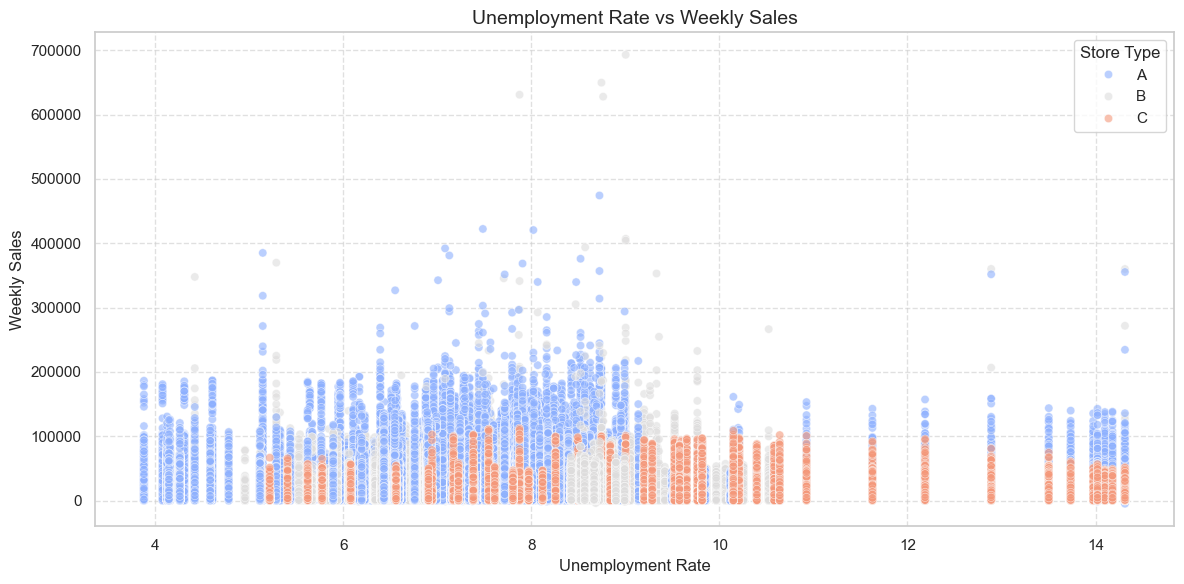

In [24]:
# Using Scatter plot to visualize Unemployment vs Weekly Sales
sns.scatterplot(data=df, x='Unemployment', y='Weekly_Sales', hue='Type', alpha=0.6, palette='coolwarm')
plt.title("Unemployment Rate vs Weekly Sales", fontsize=14)
plt.xlabel("Unemployment Rate", fontsize=12)
plt.ylabel("Weekly Sales", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Store Type')
plt.tight_layout()
plt.show()

[ *This chart visualize or asking: "If more people are jobless, do they spend less at the store?" The dots are help me to see spot any trends. If picturised any downward pattern, that means - **Yes**, peoples are spend less at the store.* ]

#### **3. Multivariate Analysis (5 charts)**

#### **3.1 Multivariate Chart #11: Store Type, Weekly Sales, and Holiday Effect**

I want to compare **Weekly Sales** accross different **Store Type**, and also see how sales behave during **Holiday weeks vs Normal weeks**.

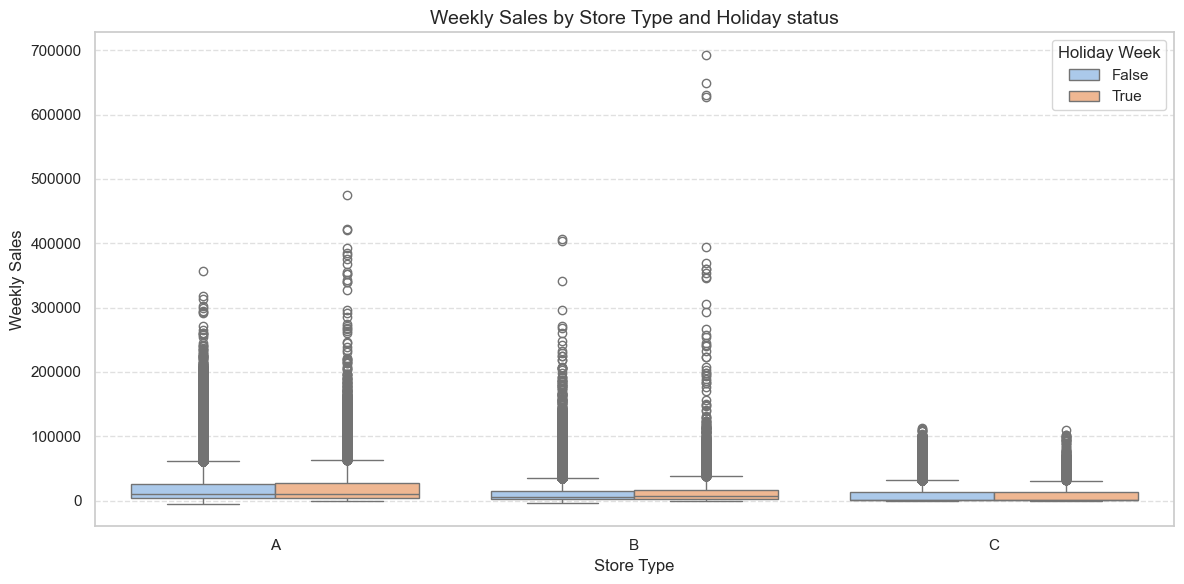

In [25]:
# Using Boxplot to visualize the Weekly Sales by Store Type and Holiday status
sns.boxplot(data=df, x='Type', y='Weekly_Sales', hue='IsHoliday', palette='pastel')
plt.title("Weekly Sales by Store Type and Holiday status", fontsize=14)
plt.xlabel("Store Type", fontsize=12)
plt.ylabel("Weekly Sales", fontsize=12)
plt.legend(title='Holiday Week')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

*The chart is like questioning me:*  
*1. Which type of store earns the most?*  
*2. Do they earn more during holiday?*  

***Ans**: By visualizing both in one plot, I can compare normal weeks and holiday weeks for each store type side-by-side.*

#### **3.2 Multivariate Chart #12: Sales by Store, Dept, and Date**

I want to see which **stores** and **depertments** consistently have **high** or **low** sales. To visualize I will use **total sales** per store and depertment.

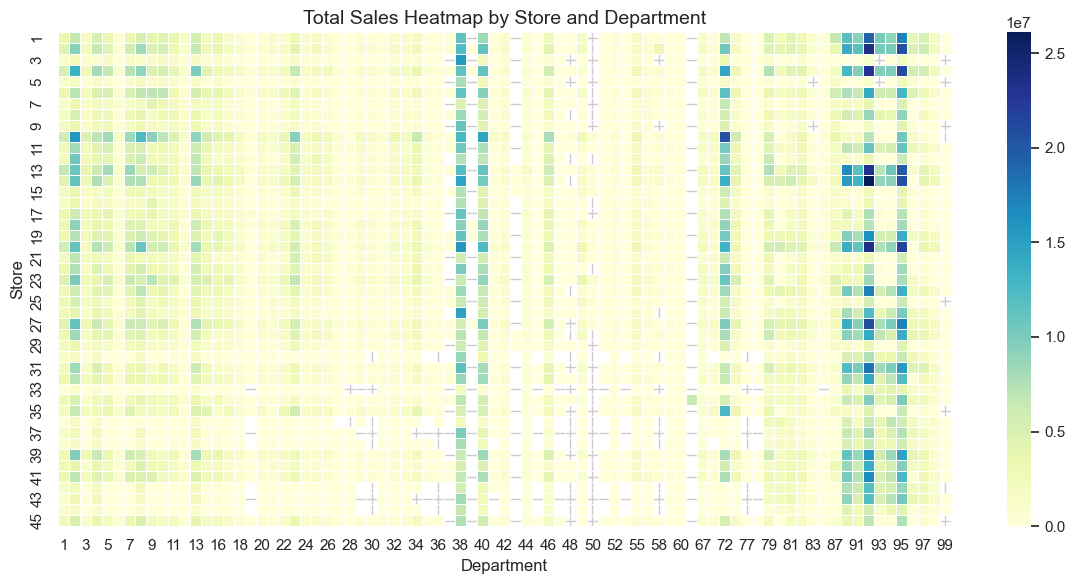

In [26]:
# Pivot table: total sales for each Store and Department
sales_pivot_table = df.pivot_table(values='Weekly_Sales', index='Store', columns='Dept', aggfunc='sum')

# Heatmap of the pivot table
sns.heatmap(sales_pivot_table, cmap='YlGnBu', linewidths=0.5)
plt.title("Total Sales Heatmap by Store and Department", fontsize=14)
plt.xlabel("Department", fontsize=12)
plt.ylabel("Store", fontsize=12)
plt.tight_layout()
plt.show()

This is like a performance chart where:
- **Bright cells = High sales**
- **Dark cells = Low sales**

#### **3.3 Multivariate Chart #13: Economic Factors (Fuel Price, CPI, Unemployment)**

I want to explore the relationship between **Fuel Price, CPI, and Unemployment**. I am using a **pairplot** which is help me to compare all variables pair-by-pair and visualize the distribution.

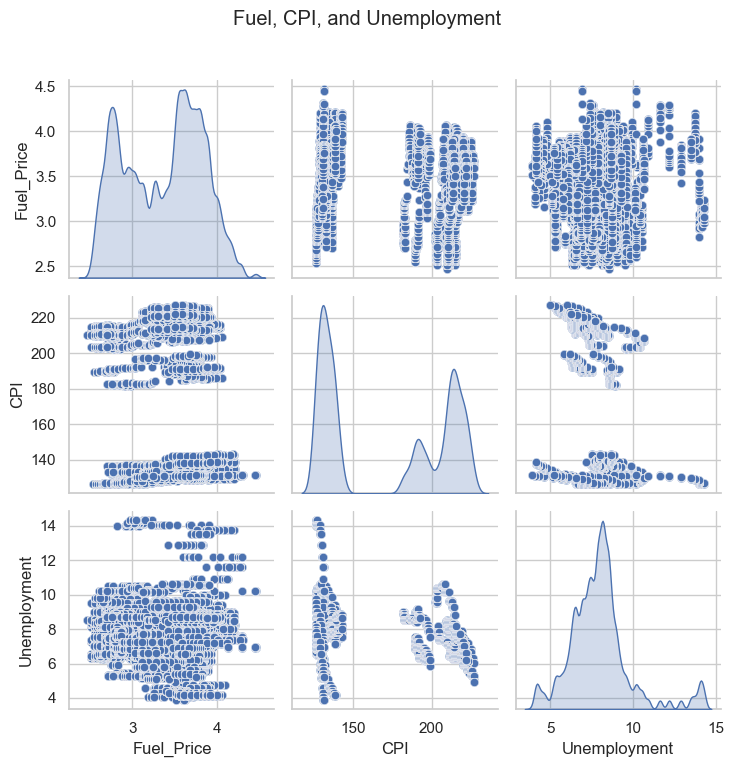

In [27]:
# Select only economic columns
economic_data = df[['Fuel_Price', 'CPI', 'Unemployment']]

# Using pairplot to compare between (Fuel Price, CPI, and Unemployement)
sns.pairplot(economic_data, kind='scatter', diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle("Fuel, CPI, and Unemployment", y=1.02)
plt.tight_layout()
plt.show()

This chart is visualize like doing 3 comparisons at a single plot:
- Fuel Price vs CPI
- CPI vs Unemployment
- Fuel Price vs Unemployment  

With, I get the indivisual distributions. 

#### **3.4 Multivariate Chart #14: MarkDown1 vs Weekly Sales by Store Type**

I want to check if offering more discounts (MarkDown1) increases weekly sales, and whether this trend is consistent accross different store types (A, B, C)

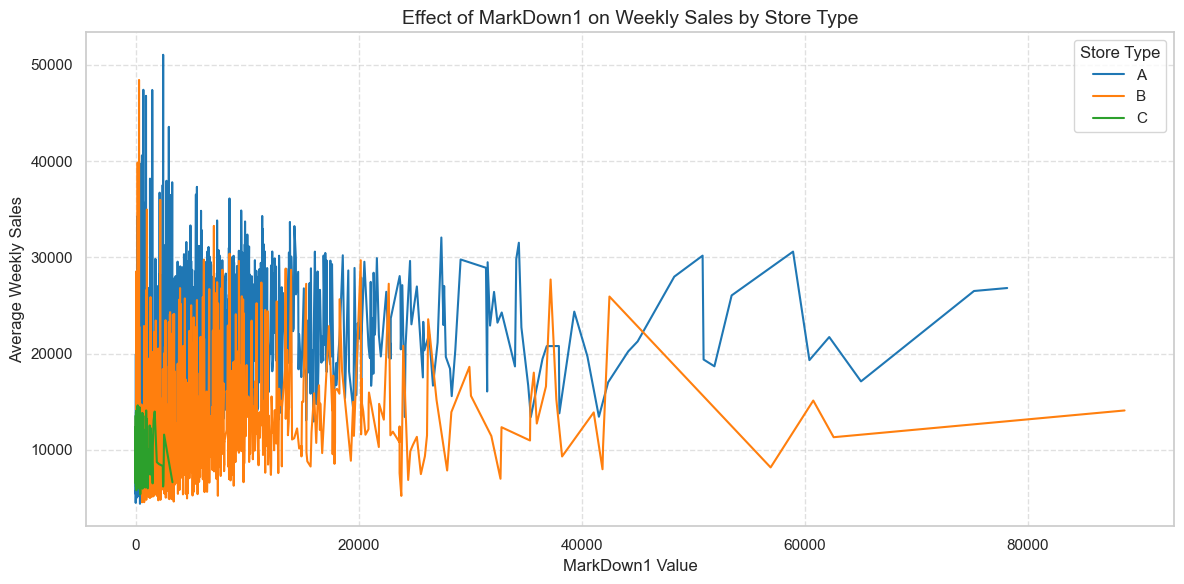

In [28]:
# Grouped
grouped_md = df.groupby(['MarkDown1', 'Type'])['Weekly_Sales'].mean().reset_index()

# Lineplot
sns.lineplot(data=grouped_md, x='MarkDown1', y='Weekly_Sales', hue='Type', palette='tab10')
plt.title("Effect of MarkDown1 on Weekly Sales by Store Type", fontsize=14)
plt.xlabel("MarkDown1 Value", fontsize=12)
plt.ylabel("Average Weekly Sales", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Store Type")
plt.tight_layout()
plt.show()

**Question**: Do `Type A` stores benefit more from offers than `Type B` or `Type C` stores?  
**Answer**: Yes, `Type A` stores show a greater benefit from offers compared to `Type B` and `Type C` stores.

#### **3.5 Multivariate Chart #15: Date vs Weekly Sales with Store Type**

I want to analyze how **weekly sales vary over time** for each **store type (A, B, C)**. This help me to identify seasonal trends, compare performance, and understand consistency.

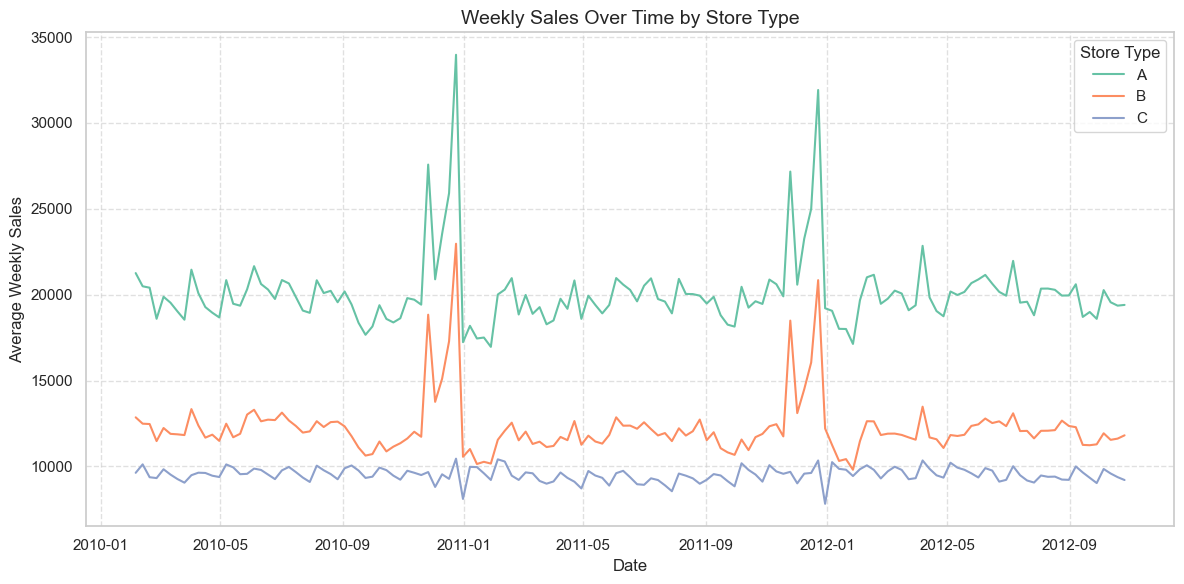

In [29]:
# Group by Date and Type to get average weekly sales
date_type_sales = df.groupby(['Date', 'Type'])['Weekly_Sales'].mean().reset_index()

# Using Line plot to visualize Weekly Sales Over Time by Store Type with hue as Store Type
sns.lineplot(data=date_type_sales, x='Date', y='Weekly_Sales', hue='Type', palette='Set2')
plt.title("Weekly Sales Over Time by Store Type", fontsize=14)
plt.xlabel("Date", fontsize=12)
plt.ylabel("Average Weekly Sales", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title="Store Type")
plt.tight_layout()
plt.show()

[ *This plot or chart visualize that tracking each store category's sales journey over the months - are `Type A` stores Always leading? Did `Tpye C` spike during holidays? I will spot all that in one smooth graph.* ]

## **7. Feature Engineering**

### **7.1 Extract Date Features**

In [30]:
# Create new time-related features from the 'Date' variable
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Week'] = df['Date'].dt.isocalendar().week.astype(int)
df['Day'] = df['Date'].dt.day
df['Quarter'] = df['Date'].dt.quarter

### **7.2 Convert Categorical to Numeric**

In [31]:
# Encode store type
lb_encd = LabelEncoder()
df['Store_Type_Code'] = lb_encd.fit_transform(df['Type'])

### **7.3 Convert IsHoliday to Integer**

In [32]:
# Convert boolean to numeric (0/1)
df['IsHoliday'] = df['IsHoliday'].astype(int)

### **7.4 Store-Level Aggregated Features**

In [33]:
# Average sales per store
store_avg = df.groupby('Store')['Weekly_Sales'].mean().rename('Store_Average_Sales')
df = df.merge(store_avg, on='Store', how='left')

# Sales per square foot
df['Sales_per_sqft'] = df['Weekly_Sales'] / df['Size']

##### **Final Feature Check**

In [34]:
display(df.head())

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,...,Type,Size,Year,Month,Week,Day,Quarter,Store_Type_Code,Store_Average_Sales,Sales_per_sqft
0,1,1,2010-02-05,24924.50,42.31,2.572,0.0,0.0,0.0,0.0,...,A,151315,2010,2,5,5,1,0,21710.543621,0.164719
1,1,2,2010-02-05,50605.27,42.31,2.572,0.0,0.0,0.0,0.0,...,A,151315,2010,2,5,5,1,0,21710.543621,0.334437
2,1,3,2010-02-05,13740.12,42.31,2.572,0.0,0.0,0.0,0.0,...,A,151315,2010,2,5,5,1,0,21710.543621,0.090805
3,1,4,2010-02-05,39954.04,42.31,2.572,0.0,0.0,0.0,0.0,...,A,151315,2010,2,5,5,1,0,21710.543621,0.264045
4,1,5,2010-02-05,32229.38,42.31,2.572,0.0,0.0,0.0,0.0,...,A,151315,2010,2,5,5,1,0,21710.543621,0.212995


## **8. Model Building**

- ### **Select Features and Target**

In [35]:
# Drop columns I don't want for modeling
drop_cols = ['Date', 'Weekly_Sales', 'Type'] 
features = df.drop(columns=drop_cols)

# Define X (Input/Independent) and y (Output/Target/Dependent)
X = features.select_dtypes(include=['number'])
y = df['Weekly_Sales']

- ### **Train-Test Split**

Split the data in 2 section with `train_test_split` model selection method. One section for Training which is 80% of data and another one this Testing which one is 20% of data. This 80:20 ratio is common.

In [36]:
# Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **8.1 Linear Regression**

**Linear Regression** tries to fit a straight line through the data that best predicts the sales. It’s like saying: “If I increase this feature, how much will sales go up or down?”

In [37]:
# Create the model
lin_reg = LinearRegression()

# Fit the model with training data
lin_reg.fit(X_train, y_train)

# Predict using the test data
y_predict_lin_reg = lin_reg.predict(X_test)

# Evaluate how good it is
print("Linear Regression:")
print(f"R2 Score: {r2_score(y_test, y_predict_lin_reg):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_predict_lin_reg)):.4f}")

Linear Regression:
R2 Score: 0.6895
RMSE: 12776.4793


**Explanation:**  
Linear Regression did okay, but not great.  
R2 Score of `0.6895` means it's able to explain around `69%` of the variations in `weekly sales`.  
But the **RMSE (error)** is quite high — around `12,776`. That means the model is making `large prediction errors`.  

**Conclusion:**  
Simple model, but **not accurate enough** for this kind of complex sales data.

### **8.2 Random Forest Regressor**

In [38]:
# Train Random Forest
rand_forest = RandomForestRegressor(
    n_estimators=50,
    max_depth=15,
    n_jobs=-1,
    random_state=42
)
rand_forest.fit(X_train, y_train)

# Prediction
y_predict_rand_forest = rand_forest.predict(X_test)

# Evaluation
print("Random Forest Regressor:")
print(f"R2 Score: {r2_score(y_test, y_predict_rand_forest):.4f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_predict_rand_forest)):.4f}")

Random Forest Regressor:
R2 Score: 0.9987
RMSE: 818.4865


**Explanation:**  
This model performed **extremely well**. It explains almost `99.87%` of the sales variation, which is very close to perfect.  
The **RMSE (error)** is just `818` — that's very low for sales data, which means predictions are almost accurate.  

**Conclusion:**  
**Best performing model** in this case. Random Forest is handling all the features and patterns beautifully.

### **8.3 XGBoost Regressor**

In [39]:
# Train XGBoost
xgb_reg = XGBRegressor(n_estimators=50, learning_rate=0.1, random_state=42)
xgb_reg.fit(X_train, y_train)

# Prediction
y_predict_xgb_reg = xgb_reg.predict(X_test)

# Evaluation
print("XGBoost Regressor:")
print(f"R2 Score {r2_score(y_test, y_predict_xgb_reg):.4f}")
print(f"RSME: {np.sqrt(mean_squared_error(y_test, y_predict_xgb_reg)):.4f}")

XGBoost Regressor:
R2 Score 0.9945
RSME: 1707.2611


**Explanation:**  
XGBoost also did a great job — not as perfect as Random Forest, but still `very strong`.  
R2 Score is `99.45%`, and **RMSE (error)** is about 1,707, which is low and acceptable for business forecasting.  

**Conclusion:**  
Very strong model. **Close second** to Random Forest. It also gives better control for tuning if needed.

**In summary:**  
- **Random Forest** gave the most accurate results — ideal for final prediction.
- **XGBoost** is also good, especially if you plan to do fine-tuning.
- **Linear Regression** was not suitable for this dataset due to high error and oversimplified approach.

### **8.4 Hyperparameter Tuning**

#### **8.4.1 Tuned Random Forest with RandomizedSearchCV**

I will tune the Random Forest Model to improve its prediction accuracy and reduce error by testing different combinations of hyperparameters.

##### **8.4.1.1 Define Parameter Grid**

I will keep the grid small and practical so that training doesn’t take too long.

In [40]:
# Define the parameter grid for Random Forest tuning
param_dist_random_forest = {
    'n_estimators' : [50, 75, 100],
    'max_depth' : [10, 15, None],
    'min_samples_split' : [2],
    'min_samples_leaf' : [1, 2]
}

##### **8.4.1.2 Setup RandomizedSearchCV**

In [41]:
# Set up RandomizedSearchCV to tune Random Forest hyperparameters using cross-validation
random_forest_model = RandomForestRegressor(random_state=42)

randomize_search_random_forest = RandomizedSearchCV(
    estimator=random_forest_model,
    param_distributions=param_dist_random_forest,
    n_iter=5,
    cv=2,
    scoring="neg_mean_squared_error",
    n_jobs=-1,
    verbose=2,
    random_state=42
)

##### **8.4.1.3 Execute the Randomized Search**

In [42]:
# Fit the model to training data
randomize_search_random_forest.fit(X_train, y_train)

# Best Random Forest Model for Randomize Search
best_random_forest = randomize_search_random_forest.best_estimator_

# Display the best parameters
print("Best Parameters for Random Forest:")
print(randomize_search_random_forest.best_params_)

Fitting 2 folds for each of 5 candidates, totalling 10 fits
Best Parameters for Random Forest:
{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 15}


##### **8.4.1.4 Evaluate Tuned Random Forest Model**

In [43]:
# Predict using the tuned model
y_predict_best_random_forest = best_random_forest.predict(X_test)

# Evaluate the performance
print(f"Tuned Random Forest R2 Score: {r2_score(y_test, y_predict_best_random_forest):.4f}")
print(f"Tuned Random Forest RSME (Error): {np.sqrt(mean_squared_error(y_test, y_predict_best_random_forest)):.4f}")

Tuned Random Forest R2 Score: 0.9988
Tuned Random Forest RSME (Error): 802.5998


**Sort Summary:** After tuning, Random Forest showed slightly better `RMSE` and maintained little better accuracy. The best parameters chosen were `n_estimators`, `min_samples_split`, `min_samples_leaf` and `max_depth`.

**R2 Score before tuned:** 0.9987 or 99.87%  
**R2 Score after tuned:** 0.9988 or 99.88%  
**RSME (Error) before tuned:** 818  
**RSME (Error) after tuned:** 802  

#### **8.4.2 Tuned XGBoost with RandomizedSearchCV**

I will tune the XGBoost to improve its prediction accuracy and reduce error by testing different combinations of hyperparameters.

##### **8.4.2.1 Define Parameter Grid**

I will keep the grid small and practical so that training doesn’t take too long.

In [44]:
# Define the parameter grid for XGBoost tuning
# This grid will be used for hyperparameter search with RandomizedSearchCV
param_dist_xgboost = {
    'n_estimators' : [100, 150],
    'learning_rate' : [0.05, 0.1],
    'max_depth' : [3, 5, 7],
    'sub_sample' : [0.8, 1.0],
    'colsample_bytree' : [0.8, 1.0]
}

##### **8.4.2.2 Setup RandomizedSearchCV**

In [45]:
# Set up RandomizedSearchCV for XGBoost hyperparameter tuning
xgboost_model = XGBRegressor(random_state=42)

# Set up RandomizedSearchCV to tune XGBoost hyperparameters using cross-validation
randomize_search_xgboost = RandomizedSearchCV(
    estimator=xgboost_model,
    param_distributions=param_dist_xgboost,
    n_iter=5,
    cv=2,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2,
    random_state=42
)

##### **8.4.2.3 Execute the RandomizedSearchCV**

In [46]:
# Fit the XGBoost model with randomized hyperparameter search on the training data
randomize_search_xgboost.fit(X_train, y_train)

# Get the best XGBoost model after randomized search
best_xgboost = randomize_search_xgboost.best_estimator_

# Display the best parameters found for XGBoost
best_param_for_xgboost = randomize_search_xgboost.best_params_

print(f"Best parameter for XGBoost:\n{best_param_for_xgboost}")

Fitting 2 folds for each of 5 candidates, totalling 10 fits
Best parameter for XGBoost:
{'sub_sample': 0.8, 'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1, 'colsample_bytree': 1.0}


##### **8.4.1.4 Evaluate Tuned XGBoost Model**

In [47]:
# Predict using the tuned model
y_predict_best_xgboost = best_xgboost.predict(X_test)

# Evaluate the performance
print(f"Tuned XGBoost R2 Score: {r2_score(y_test, y_predict_best_xgboost):.4f}")
print(f"Tuned XGBoost RSME (Error): {np.sqrt(mean_squared_error(y_test, y_predict_best_xgboost)):.4f}")

Tuned XGBoost R2 Score: 0.9946
Tuned XGBoost RSME (Error): 1683.9571


**Sort Summary:** After tuning, XGBoost showed slightly better `RMSE` and maintained little better accuracy. The best parameters chosen were `sub_sample`, `n_estimators`, `max_depth`, `learning_rate`, and `colsample_bytree`.

**R2 Score before tuned:** 0.9945 or 99.45%  
**R2 Score after tuned:** 0.9946 or 99.46%  
**RSME (Error) before tuned:** 1707  
**RSME (Error) after tuned:** 1683  

## **9. Visual Evaluation – Actual vs Predicted Charts**

### **9.1 Line Plot for All 3 Models**

This will help me compare actual and predicted sales **side-by-side** for a sample of records (first 100).

#### **9.1.1 Before Tuning: Comparison of Original Models**

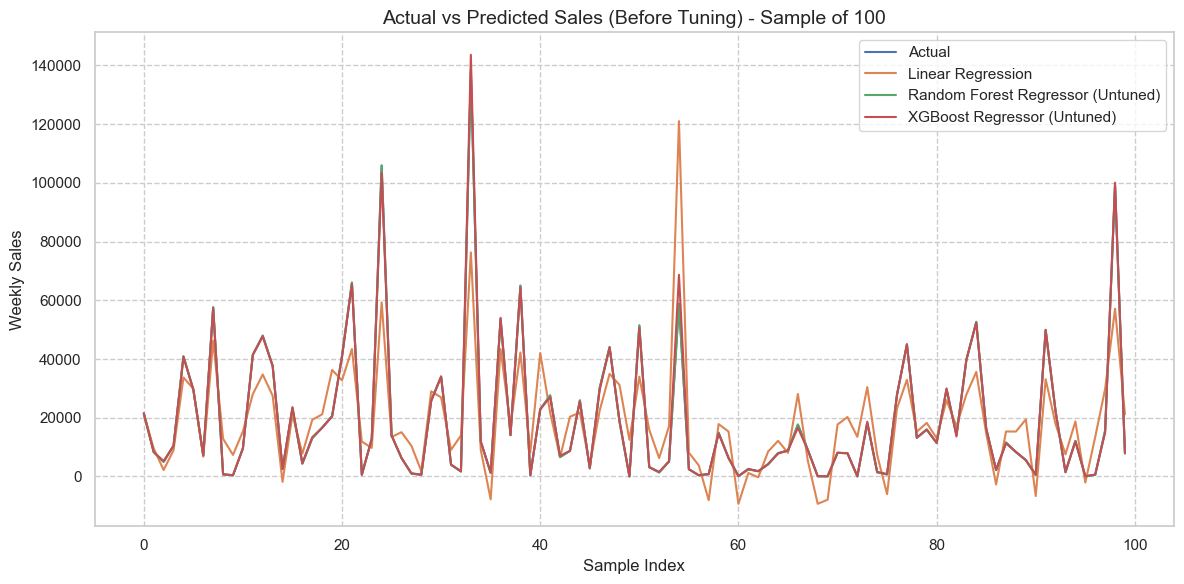

In [48]:
# Create a DataFrame to compare actual and predicted sales for the first 100 test samples
comp_df_before = pd.DataFrame({
    'Actual' : y_test.values[:100],
    'Linear Regression' : y_predict_lin_reg[:100],
    'Random Forest Regressor (Untuned)' : y_predict_rand_forest[:100],
    'XGBoost Regressor (Untuned)' : y_predict_xgb_reg[:100] 
})

# Prepare a comparison DataFrame for actual and predicted sales from all three models (first 100 test samples)
plt.plot(comp_df_before['Actual'], label='Actual')
plt.plot(comp_df_before['Linear Regression'], label='Linear Regression')
plt.plot(comp_df_before['Random Forest Regressor (Untuned)'], label='Random Forest Regressor (Untuned)')
plt.plot(comp_df_before['XGBoost Regressor (Untuned)'], label='XGBoost Regressor (Untuned)')
plt.title('Actual vs Predicted Sales (Before Tuning) - Sample of 100', fontsize=14)
plt.xlabel('Sample Index', fontsize=12)
plt.ylabel('Weekly Sales', fontsize=12)
plt.legend()
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

#### **9.1.2 After Tuning: Comparison of Original Models**

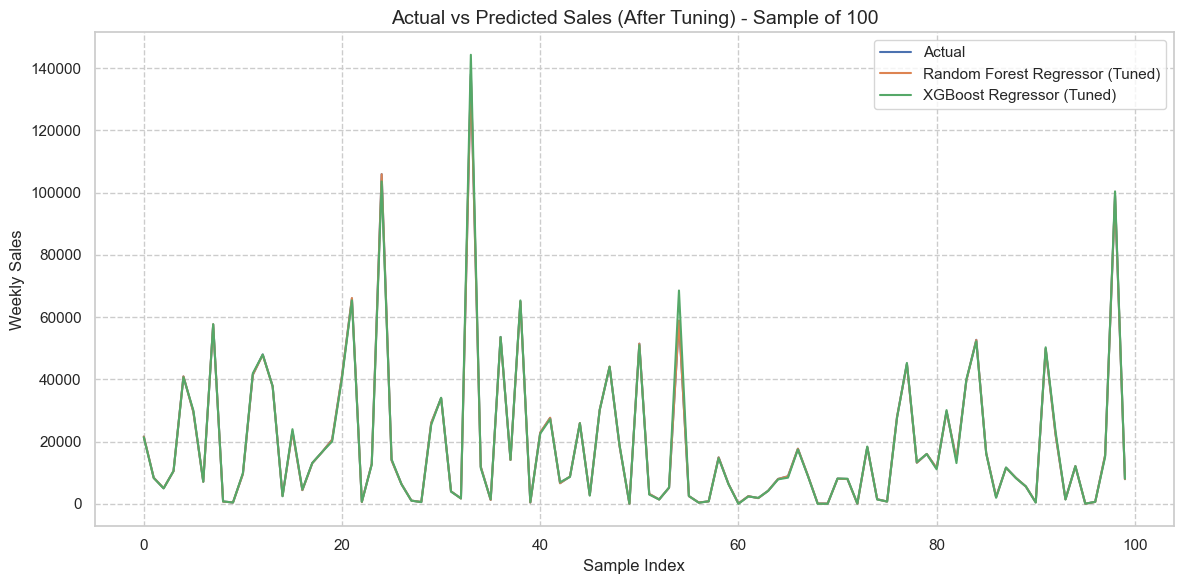

In [49]:
# Create a DataFrame to compare actual and tuned model predictions for the first 100 test samples
comp_df_after = pd.DataFrame({
    'Actual' : y_test.values[:100],
    'Random Forest Regressor (Tuned)' : y_predict_best_random_forest[:100],
    'XGBoost Regressor (Tuned)' : y_predict_best_xgboost[:100]
})

# Plot actual vs predicted weekly sales for tuned Random Forest and XGBoost models (first 100 test samples)
plt.plot(comp_df_after['Actual'], label='Actual')
plt.plot(comp_df_after['Random Forest Regressor (Tuned)'], label='Random Forest Regressor (Tuned)')
plt.plot(comp_df_after['XGBoost Regressor (Tuned)'], label='XGBoost Regressor (Tuned)')
plt.title("Actual vs Predicted Sales (After Tuning) - Sample of 100", fontsize=14)
plt.xlabel("Sample Index", fontsize=12)
plt.ylabel("Weekly Sales", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--')
plt.tight_layout()
plt.show()

### **9.2 Scatter Plot (Actual vs Predicted)**

#### **9.2.1 Common function**

In [50]:
# Common scatter plot function to visualize actual vs predicted sales for any model
def scatter_plot(predict, model):
    sns.scatterplot(x=y_test, y=predict)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()])
    plt.title(f"{model}: Actual vs Predicted", fontsize=14)
    plt.xlabel("Actual Sales", fontsize=12)
    plt.ylabel("Predicted Sales", fontsize=12)
    plt.grid(True, linestyle='--')
    plt.tight_layout()
    plt.show()

#### **9.2.2 Scatter Plots - Before Tuning**

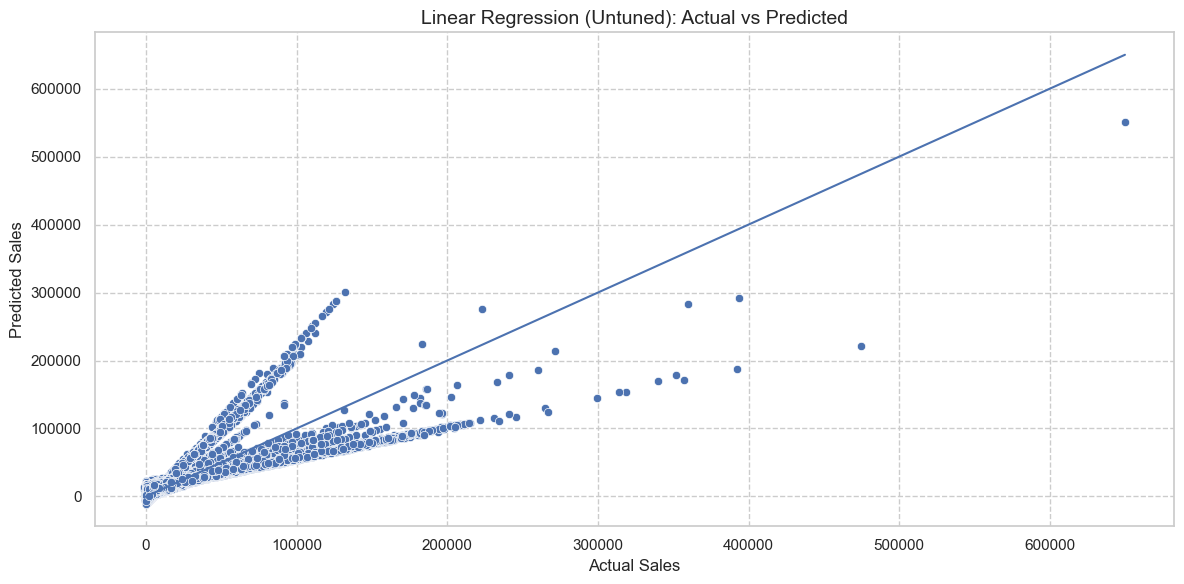

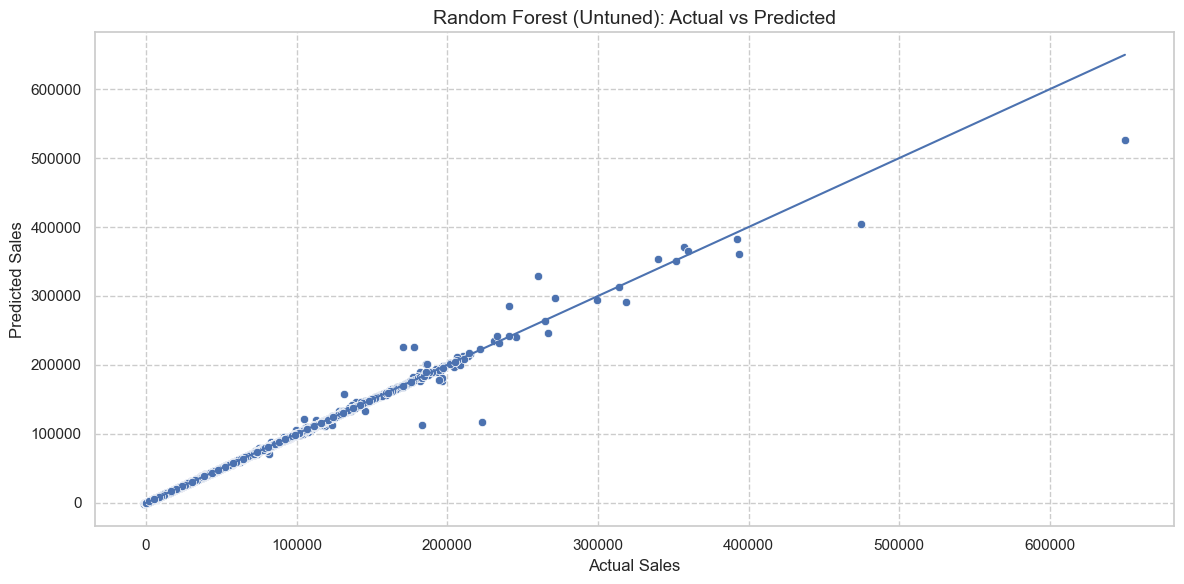

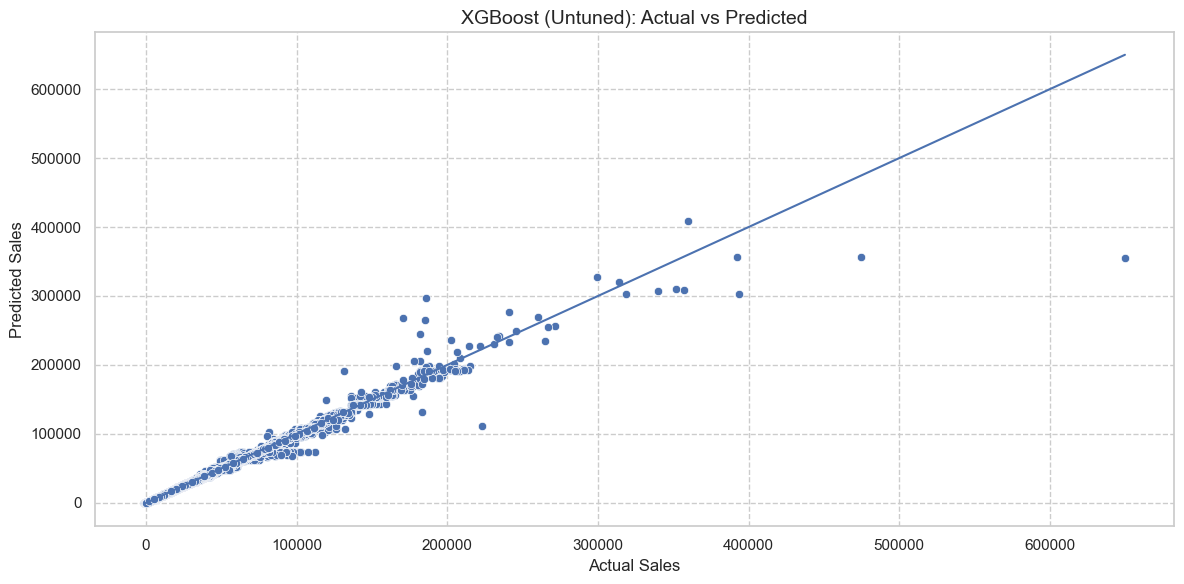

In [51]:
# Plot scatter plots comparing actual vs predicted sales for each untuned model
scatter_plot(y_predict_lin_reg, "Linear Regression (Untuned)")
scatter_plot(y_predict_rand_forest, "Random Forest (Untuned)")
scatter_plot(y_predict_xgb_reg, "XGBoost (Untuned)")

#### **9.2.3 Scatter Plots - After Tuning**

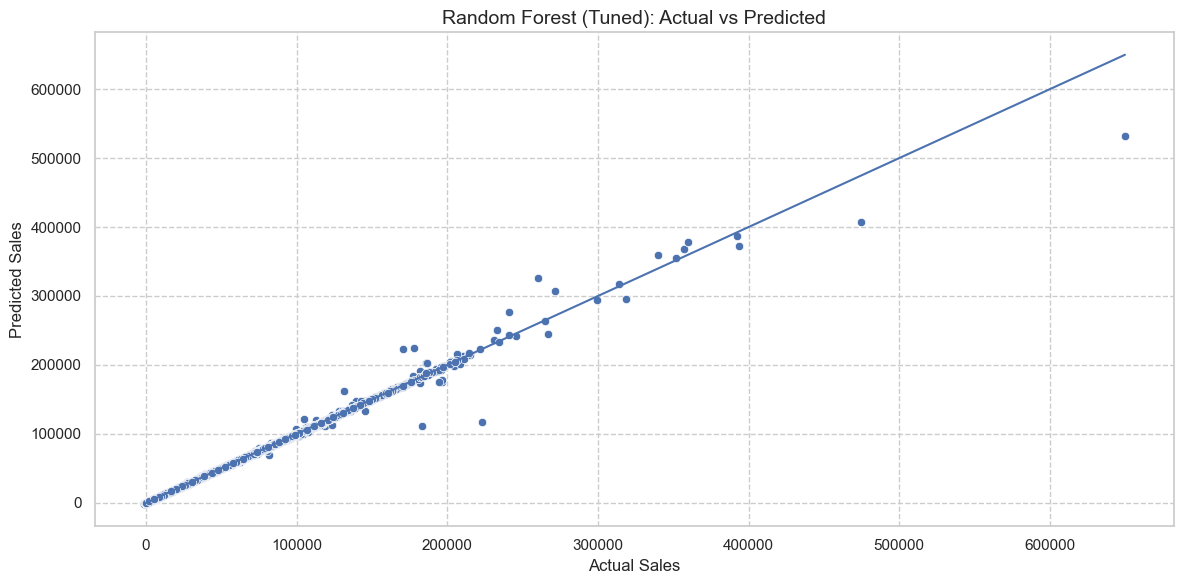

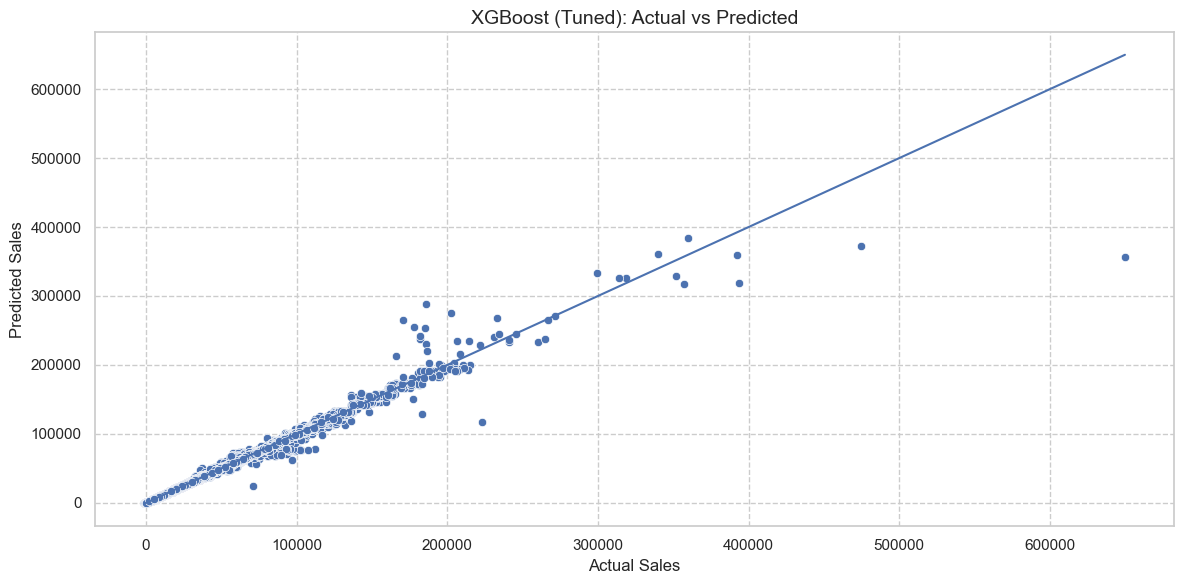

In [52]:
# Plot scatter plots comparing actual vs predicted sales for each tuned model
scatter_plot(y_predict_best_random_forest, "Random Forest (Tuned)")
scatter_plot(y_predict_best_xgboost, "XGBoost (Tuned)")

**Explaination:**
- If the **dots are close to the diagonal line**, it means predictions are actuate.
- If there are **spread far away**, the model is making mistake.
- I will see **Random Forest** and **XGBoost have tight cluster near the line (after tuned)**, while **Linear Regression** will likely show more acurate. 

#### **9.2.4 Final Model Comparison Table**

In [53]:
# Create a summary DataFrame comparing R2 scores and RMSE for all models (before and after tuning)
summary_df = pd.DataFrame({
    'Model' : [
        'Linear Regression',
        'Random Rorest Regressor (Untuned)',
        'Random Rorest Regressor (Tuned)',
        'XGBoost Regressor (Untuned)',
        'XGBoost Regressor (Tuned)',
    ],
    'R2 Score' : [
        round(r2_score(y_test, y_predict_lin_reg), 4),
        round(r2_score(y_test, y_predict_rand_forest), 4),
        round(r2_score(y_test, y_predict_best_random_forest), 4),
        round(r2_score(y_test, y_predict_xgb_reg), 4),
        round(r2_score(y_test, y_predict_best_xgboost), 4),
    ],
    'RSME (Error)' : [
        round(np.sqrt(mean_squared_error(y_test, y_predict_lin_reg)), 4),
        round(np.sqrt(mean_squared_error(y_test, y_predict_rand_forest)), 4),
        round(np.sqrt(mean_squared_error(y_test, y_predict_best_random_forest)), 4),
        round(np.sqrt(mean_squared_error(y_test, y_predict_xgb_reg)), 4),
        round(np.sqrt(mean_squared_error(y_test, y_predict_best_xgboost)), 4),
    ]
})

display(summary_df)

,Model,R2 Score,RSME (Error)
0,Linear Regression,0.6895,12776.4793
1,Random Rorest Regressor (Untuned),0.9987,818.4865
2,Random Rorest Regressor (Tuned),0.9988,802.5998
3,XGBoost Regressor (Untuned),0.9945,1707.2611
4,XGBoost Regressor (Tuned),0.9946,1683.9571


## **10. Insights & Recommendations**

### **10.1 Key Insights from Data Analysis & Visualizations**

1. **Store Type A is the most common**, and it consistently shows the **highest weekly sales**, especially during **holiday weeks** and **festive seasons**.

2. **Larger stores (with more square footage)** generally achieve **better sales**, although store type and other factors also influence performance — size alone doesn't guarantee success.

3. There's a **clear seasonal pattern in sales** — sharp spikes are visible during **holiday weeks**, such as festivals and year-end weeks, highlighting the importance of timing in promotions.

4. Economic indicators like **Fuel Price**, **CPI**, and **Unemployment** don’t show a strong direct impact on weekly sales, but they may have an **indirect or delayed influence**, depending on external market conditions.

5. **MarkDown1 (discount offers)** clearly boost sales, especially for **Type A and B stores**. This suggests that planned offers and pricing strategies play a big role in customer buying behaviour.

6. The **multivariate heatmap analysis** revealed that certain **departments consistently perform better** across multiple stores — pointing toward strong demand in those categories, better layout, or stock management strategies.

### **10.2 Model Insights:**
| Model                       | R² Score   | RMSE   | Comments                                                |
| --------------------------- | ---------- | -------| ------------------------------------------------------- |
| Linear Regression           | 0.6895     | 12,776 | Basic model; underfits data; not suitable for real use  |
| Random Forest (Untuned)     | 0.9987     | 818    | Excellent out of the box; captures patterns very well   |
| **Random Forest (Tuned)**   | `0.9988`   | `802`  | **Slight improvement; best performer; highly reliable** |
| XGBoost (Untuned)           | 0.9945     | 1,707  | Strong model; good results but slightly behind RF       |
| XGBoost (Tuned)             | 0.9946     | 1,683  | Minor improvement; efficient but RF still outperforms   |

- **Random Forest Regressor** performed the best with near-perfect accuracy.
- **XGBoost** is also a great option, especially for future model tuning.
- **Linear Regression** is not suitable here due to oversimplification.

### **10.3 Recommendations**

1. **Use the Random Forest model** for weekly sales prediction. It gave the best results in terms of accuracy and stability, and it's also easy to explain to non-technical or business teams.

2. Focus more on **Store Type A**. These stores consistently bring in the highest sales, so they deserve more attention in terms of planning, stocking, and promotions.

3. **Launch discount offers (MarkDowns) smartly**, especially during festive seasons. Timing offers properly can lead to a big boost in customer footfall and weekly revenue.

4. Maintain a strong **holiday-focused sales strategy**. Holidays are clearly peak sales periods — extra efforts during these weeks (like campaigns, combo deals, or flash sales) can bring great results.

5. Keep an eye on **underperforming departments**. As seen in the heatmap, some departments lag behind others. These need rethinking in terms of layout, visibility, offers, or even staff training.

6. Create a simple **dashboard for sales forecasting** using the trained model. This will help the management team take **quick, data-driven decisions** every week, rather than relying on guesswork.

## **11. Conclusion**

In this project, I worked on **Integrated Retail Analytics for Store Optimization** using real-world retail datasets that included sales figures, store-related information, and external factors like fuel price, holiday indicators, markdown offers, and more.

I started with thorough **data cleaning and preparation**, and then performed a detailed **Univariate, Bivariate, and Multivariate (UBM) analysis** to explore important trends and patterns — such as sales behavior across store types, seasonal spikes, the effect of offers, and department-wise performance.

After understanding the data well, I moved on to building machine learning models to predict weekly sales more accurately. I used three different models:

- **Linear Regression** gave a basic baseline model. It helped understand the linear relationship but didn’t perform well in terms of accuracy.

- **Random Forest Regressor** gave the best performance after `hyper tuned` with a very high **R2 Score (0.9988 or 99.88%)** and **low RMSE (802)**. It captured complex patterns effectively and worked great without much tuning.

- **XGBoost Regressor** also performed well after `hyper tuned`, with slightly lower accuracy than Random Forest. It showed promise and improved further after tuning.

Overall, this project helped me understand how to combine **data analysis and machine learning** to solve real business problems in the retail sector. It also showed how important feature engineering, tuning, and visual storytelling are in building a successful predictive model.

---
---
---